<a href="https://colab.research.google.com/github/Alxsoa/Alexandre-Soares/blob/main/AnaliseEleicaoPOA2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://github.com/Alxsoa/Eleicoes2020.git
#######################################################################
# Inclusao de Modulos Necessarios 
#######################################################################
#
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

#
#######################################################################
# Definindo Ambiente Google
#######################################################################
#
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#
#######################################################################
# Definindo Customizações
#######################################################################
#
pd.options.display.max_rows = 100

Mounted at /content/drive


In [2]:
#
#######################################################################
# Definindo o Diretorio dos datasets
#######################################################################
#

PATH    = "/content/drive/MyDrive/Dataset/"
CSVFile = "bweb_1t_RS_181120201549.csv"
CSVDATA = PATH + CSVFile

#
#######################################################################
# Leitura dos datasets
#######################################################################
#
DadosCandidatoEleicao2020 = pd.read_csv( CSVDATA, sep = ';', encoding = 'iso-8859-1')


In [3]:
#
#######################################################################
# Separando Dados de Interesse dos Demais Dados
#######################################################################
#
CandidatoEleicao2020  = DadosCandidatoEleicao2020[DadosCandidatoEleicao2020['SG_UF'] == "RS"]

In [4]:
#
#######################################################################
# Exclusao de Colunas do Dataset 2020
#######################################################################
#
Colunas = set (CandidatoEleicao2020.columns)
Colunas.remove('DT_GERACAO')
Colunas.remove('HH_GERACAO')
Colunas.remove('ANO_ELEICAO')
Colunas.remove('NR_TURNO')
Colunas.remove('CD_TIPO_URNA')
Colunas.remove('NR_VOTAVEL')
Colunas.remove('CD_ELEICAO')
Colunas.remove('NR_URNA_EFETIVADA')
Colunas.remove('CD_CARGA_1_URNA_EFETIVADA')
Colunas.remove('DT_CARGA_URNA_EFETIVADA')
Colunas.remove('DT_ABERTURA')
Colunas.remove('DT_ENCERRAMENTO')
Colunas.remove('DT_PLEITO')
Colunas.remove('NM_TIPO_ELEICAO')
Colunas.remove('DT_EMISSAO_BU')
Colunas.remove('DS_AGREGADAS')
Colunas.remove('NR_JUNTA_APURADORA')
Colunas.remove('DT_BU_RECEBIDO')
Colunas.remove('CD_TIPO_VOTAVEL')
Colunas.remove('QT_ELEITORES_BIOMETRIA_NH')
Colunas.remove('DS_CARGO_PERGUNTA_SECAO')
Colunas.remove('CD_FLASHCARD_URNA_EFETIVADA')
Colunas.remove('CD_TIPO_ELEICAO')
Colunas.remove('NR_TURMA_APURADORA')
Colunas.remove('CD_CARGA_2_URNA_EFETIVADA')
Colunas.remove('DS_ELEICAO')
Colunas.remove('CD_PLEITO')
Colunas.remove('CD_MUNICIPIO')
Colunas.remove('CD_CARGO_PERGUNTA')
Colunas.remove('SG_UF')
Colunas.remove('NR_LOCAL_VOTACAO')
Colunas.remove('DS_TIPO_VOTAVEL')
Colunas.remove('DS_TIPO_URNA')
DadosCandidatoEleicao2020 = CandidatoEleicao2020[Colunas]

In [49]:
PrefeitoEleicao2020 = DadosCandidatoEleicao2020[DadosCandidatoEleicao2020['DS_CARGO_PERGUNTA'] == "Prefeito"]
PrefeitoEleicao2020.drop(PrefeitoEleicao2020["QT_VOTOS"] == 95)
PrefeitoEleicao2020["QT_VOTOS"].unique()

KeyError: ignored

In [46]:
df = PrefeitoEleicao2020.groupby("NM_MUNICIPIO")
df = df.drop(PrefeitoEleicao2020["QT_VOTOS"] == "Branco")


AttributeError: ignored

In [ ]:
#
#######################################################################
# Separa os Dados de Interesse
#######################################################################
#
PrefeitoEleicao2020 = DadosCandidatoEleicao2020[DadosCandidatoEleicao2020['DS_CARGO_PERGUNTA'] == "Prefeito"]
PrefeitoMunicipioEleicao2020 = PrefeitoEleicao2020[PrefeitoEleicao2020['NM_MUNICIPIO'] == "PORTO ALEGRE"]

#
#######################################################################
# Exclui Dados Brancos e Nulos
#######################################################################
#
ListaCandidatosEleicao2020 = list(PrefeitoMunicipioEleicao2020['NM_VOTAVEL'].unique())
ListaCandidatosEleicao2020.remove('Branco')
ListaCandidatosEleicao2020.remove('Nulo')

In [ ]:
#
#######################################################################
# Calcula os Votos por Candidato
#######################################################################
#

Candidato = []
Partido = []
Votos = []
for iAux in range(len(ListaCandidatosEleicao2020)):
    Notavel = PrefeitoEleicao2020[PrefeitoEleicao2020['NM_VOTAVEL'] == ListaCandidatosEleicao2020[iAux]]
    VotosNotavel = Notavel['QT_VOTOS'].sum()

    Partido.append(Notavel['SG_PARTIDO'].unique())
    Candidato.append(ListaCandidatosEleicao2020[iAux] )
    Votos.append(VotosNotavel)

In [ ]:
#
#######################################################################
# Apresenta a Tabela de Dados
#######################################################################
#
# Referencia para Checagem
# https://noticias.uol.com.br/eleicoes/2020/apuracao/1turno/rs/porto-alegre/
#
dfVotos = pd.DataFrame({'Votos': Votos})
dfCandidato = pd.DataFrame({'Candidato': Candidato})
dfPartido = pd.DataFrame({'Partido': Partido})

dfCandidatoPartidoVotos = pd.concat([dfCandidato, dfPartido, dfVotos], axis=1)
dfCandidatoPartidoVotos = dfCandidatoPartidoVotos.dropna()
dfCandidatoPartidoVotos.columns = ["Candidato", "Partido", "Votos"]
dfCandidatoPartidoVotos

,Candidato,Partido,Votos
0,NELSON MARCHEZAN JÚNIOR,[PSDB],136063
1,JULIANA BRIZOLA,[PDT],41407
2,SEBASTIÃO MELO,[MDB],200280
3,VALTER,[PSD],20033
4,MONTSERRAT MARTINS,[PV],1415
5,FORTUNATI,[PTB],5585
6,MANUELA,[PC do B],187262
7,JULIO FLORES,[PSTU],852
8,GUSTAVO PAIM,[PP],7989
9,FERNANDA MELCHIONNA,[PSOL],27994


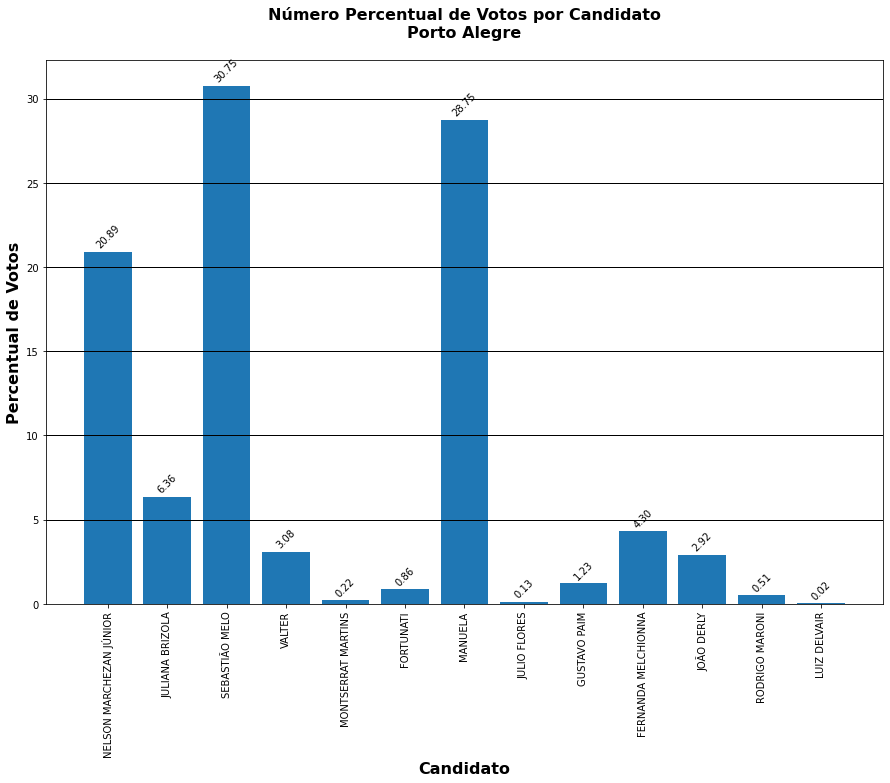

In [ ]:
def plot_value_labels(axis):
    rects = axis.patches

    for rect in rects:
        ValorY = rect.get_height()
        ValorX = rect.get_x() + rect.get_width() / 2

        label = '{:.2f}'.format(ValorY)
        va = 'bottom'

        if ValorY < 0:
            space *= -1
            va = 'top'
            
        
        plt.title ('Número Percentual de Votos por Candidato\nPorto Alegre\n', fontsize=16, fontweight='bold')
        plt.ylabel('Percentual de Votos', fontsize=16, fontweight='bold')
        plt.xlabel('Candidato', fontsize=16, fontweight='bold')
        axis.annotate(label, (ValorX, ValorY), xytext=(0, 2), textcoords="offset points", ha='center', rotation=45, va=va)    


plt.figure(figsize=(15,10))
plt.grid(which='major', axis='y', linestyle='-', color='k', linewidth=1)
plt.xticks(rotation=90)
plt.bar(Candidato,((Votos / sum(Votos)) * 100))
plot_value_labels(plt.gca())

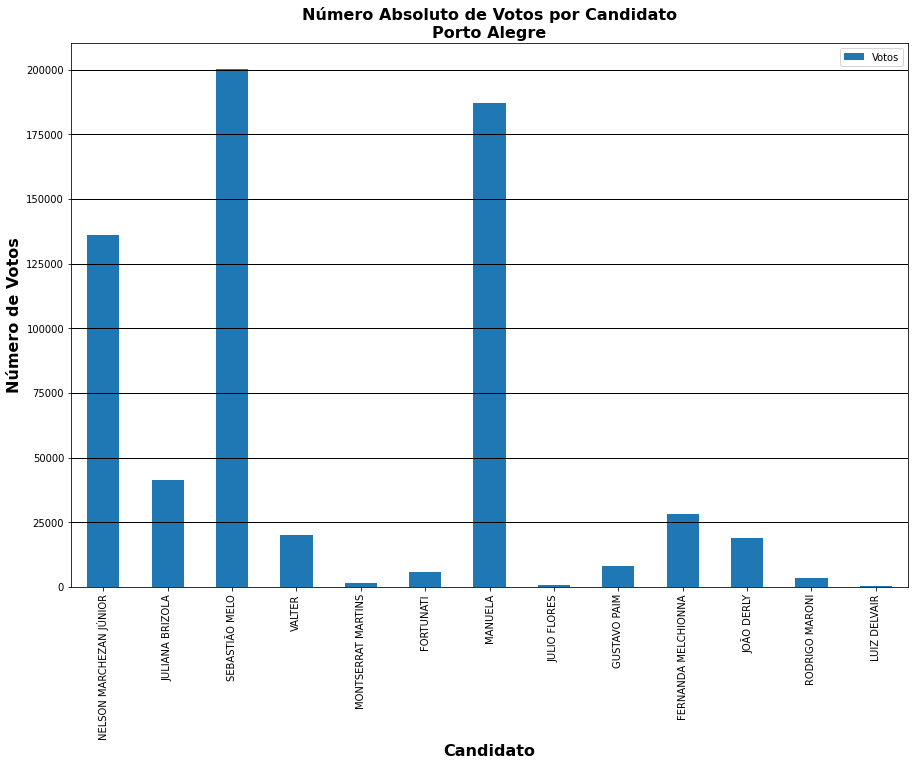

In [ ]:
#
#######################################################################
# Apresenta o Grafico de Resultados
#######################################################################
#
df = pd.DataFrame({'Votos': Votos}, index=Candidato)
df.plot(kind='bar', figsize=(15,10))
plt.grid(which='major', axis='y', linestyle='-', color='k', linewidth=1)
plt.title ('Número Absoluto de Votos por Candidato\nPorto Alegre', fontsize=16, fontweight='bold')
plt.ylabel('Número de Votos', fontsize=16, fontweight='bold')
plt.xlabel('Candidato', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#
#######################################################################
# Lista de Partidos nos Brasil
# https://www.todapolitica.com/partidos-politicos-brasil/
#######################################################################
#

# Usar um dataframe

PartidoSigla = [ 'MDB',  'PTB',       'PDT',    'PT', 
                 'DEM',  'PC do B',   'PSB',    'PSDB',
                 'PTC',  'PSC',       'PMN',    'REPUBLICANOS',
                 'PPS',  'PV',        'AVANTE', 'PP',
                 'PSTU', 'PCB',       'PRTB',   'PHS',
                 'DC',   'PCO',       'PODE',   'PSL',
                 'PRB',  'PSOL',      'PR',     'PSD',
                 'PPL',  'PATRIOTAS', 'PROS',   'SOLIDARIEDADE',
                 'NOVO', 'REDE',      'PMB' ]

PartidoPosicao = [  'Centro',          'Centro',           'Centro-Esquerda', 'Centro-Esquerda',
                    'Centro-Direita',  'Extrema-Esquerda', 'Centro-Esquerda', 'Centro-Direita',
                    'Centro-Direta',   'Direita',          'Esquerda',        'Direita',
                    'Centro-Esquerda', 'Centro-Esquerda',  'Centro',          'Direita',
                    'Extrema-Esquerda','Extrema-Esquerda', 'Extrema-Direita', 'Centro-Direita',
                    'Centro-Direita',  'Extrema-Esquerda', 'Centro',          'Extrema-Direita',
                    'Centro-Direita',  'Extrema-Esquerda', 'Centro-Direita',  'Centro',
                    'Esquerda',        'Extrema-Direta',   'Centro-Esquerda', 'Centro-Esquerda',
                    'Direita',         'Centro-Esquerda',  'Centro-Esquerda' ]

PartidoNome = [     'Movimento Democrático Brasileiro',               'Partido Trabalhista Brasileiro',
                    'Partido Democrático Trabalhista',                'Partido dos Trabalhadores',
                    'Democratas',                                     'Partido Comunista do Brasil',
                    'Partido Socialista Brasileiro',                  'Partido da Social Democracia Brasileira',
                    'Partido Trabalhista Cristão',                    'Partido Social Cristão',
                    'Partido da Mobilização Nacional',                'Partido Republicano Progressista',
                    'Partido Popular Socialista',                     'Partido Verde',
                    'Avante',                                         'Partido Progressista',
                    'Partido Socialista dos Trabalhadores Unificado', 'Partido Comunista Brasileiro',
                    'Partido Renovador Trabalhista Brasileiro',       'Partido Humanista da Solidariedade',
                    'Democracia Cristã',                              'Partido da Causa Operária',
                    'Podemos',                                        'Partido Social Liberal',
                    'Partido Republicano Brasileiro',                 'Partido Socialismo e Liberdade',
                    'Partido da República',                           'Partido Social Democrático',
                    'Partido Pátria Livre',                           'Patriota',
                    'Partido Republicano da Ordem Nacional',          'Solidariedade',
                    'Partido Novo',                                   'Rede Sustentabilidade',
                    'Partido da Mulher Brasileira'     ]


In [ ]:
#
#######################################################################
# Construcao do Dataframe de Partidos
#######################################################################
#
dfSigla   = pd.DataFrame ({'Sigla': PartidoSigla})
dfPosicao = pd.DataFrame ({'Posicao': PartidoPosicao})
dfNome    = pd.DataFrame ({'Nome': PartidoNome })

dfSiglaNomePosicao = pd.concat([dfSigla, dfNome, dfPosicao], axis=1)
dfSiglaNomePosicao.columns = ["Sigla", "Nome", "Posicao"]
dfSiglaNomePosicao.sort_values(by=['Posicao'], inplace=True)
dfSiglaNomePosicao

,Sigla,Nome,Posicao
0,MDB,Movimento Democrático Brasileiro,Centro
1,PTB,Partido Trabalhista Brasileiro,Centro
27,PSD,Partido Social Democrático,Centro
22,PODE,Podemos,Centro
14,AVANTE,Avante,Centro
4,DEM,Democratas,Centro-Direita
26,PR,Partido da República,Centro-Direita
7,PSDB,Partido da Social Democracia Brasileira,Centro-Direita
24,PRB,Partido Republicano Brasileiro,Centro-Direita
20,DC,Democracia Cristã,Centro-Direita


In [ ]:
PosicaoPolitica = dfCandidatoPartidoVotos.Partido

VotosCentro = 0
VotosCentroDireita  = 0
VotosCentroEsquerda = 0
VotosDireita  = 0
VotosEsquerda = 0
VotosExtremaDireita  = 0
VotosExtremaEsquerda = 0


for iAux in range(len(PosicaoPolitica)):
    for jAux in range(len(dfSiglaNomePosicao)):
        if ( dfCandidatoPartidoVotos.Partido[iAux] == dfSiglaNomePosicao.Sigla[jAux] ):
            
            if ( dfSiglaNomePosicao.Posicao[jAux] == "Centro" ):
                VotosCentro = VotosCentro + dfCandidatoPartidoVotos.Votos[iAux]
                
            elif ( dfSiglaNomePosicao.Posicao[jAux] == "Centro-Direita" ):
                VotosCentroDireita = VotosCentroDireita + dfCandidatoPartidoVotos.Votos[iAux]
                
            elif ( dfSiglaNomePosicao.Posicao[jAux] == "Centro-Esquerda" ):
                VotosCentroEsquerda = VotosCentroEsquerda + dfCandidatoPartidoVotos.Votos[iAux]
                
            elif ( dfSiglaNomePosicao.Posicao[jAux] == "Direita" ):
                VotosDireita = VotosDireita + dfCandidatoPartidoVotos.Votos[iAux]
                
            elif ( dfSiglaNomePosicao.Posicao[jAux] == "Esquerda" ):
                VotosEsquerda = VotosEsquerda + dfCandidatoPartidoVotos.Votos[iAux]
                
            elif ( dfSiglaNomePosicao.Posicao[jAux] == "Extrema-Direita" ):
                VotosExtremaDireita = VotosExtremaDireita + dfCandidatoPartidoVotos.Votos[iAux]                
                
            elif ( dfSiglaNomePosicao.Posicao[jAux] == "Extrema-Esquerda" ):
                VotosExtremaEsquerda = VotosExtremaEsquerda + dfCandidatoPartidoVotos.Votos[iAux]  

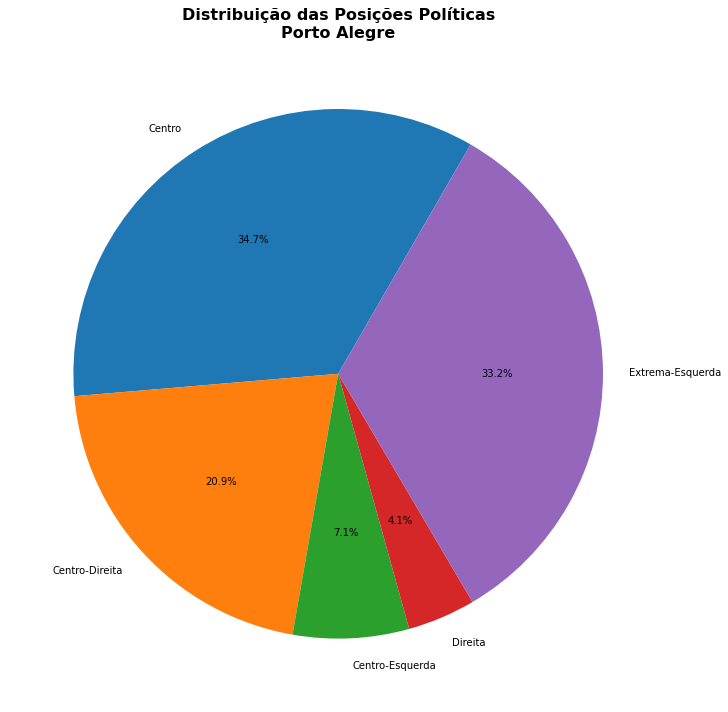

In [ ]:
#
#######################################################################
# Criando o DataFrame
#######################################################################
#

df4 =  pd.DataFrame ({
                      'Sigla': [ 'Centro', 
                                 'Centro-Direita', 
                                 'Centro-Esquerda', 
                                 'Direita', 
                                 'Extrema-Esquerda'],
                      
                      'Votos': [ VotosCentro, 
                                 VotosCentroDireita, 
                                 VotosCentroEsquerda, 
                                 VotosDireita, 
                                 VotosExtremaEsquerda]
                    })

#
#######################################################################
# Apresenta o Grafico de Resultados
#######################################################################
#
fig = plt.figure(figsize =(15, 10))
plt.pie ( df4['Votos'], labels=df4['Sigla'], startangle=60, autopct='%1.1f%%' )
plt.title ('Distribuição das Posições Políticas\nPorto Alegre', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()